### Notebook to explore acquired raw data
* Multiple DKIST sets
* MURaM

In [3]:
import matplotlib.pyplot as plt
import os, sys
import numpy as np
import astropy.io.fits as fits

#### DKIST VBI_2022_05 series [Oct 28, 2023]

200 co-aligned G-band 4090 x 4096 images, 6.3 second cadence
 
Aquired Oct 28, 2023 (via https://o365coloradoedu-my.sharepoint.com/personal/kere1282_colorado_edu/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fkere1282%5Fcolorado%5Fedu%2FDocuments%2FDKIST%2Fdata%2FMay2022%2F26May2022&ga=1)

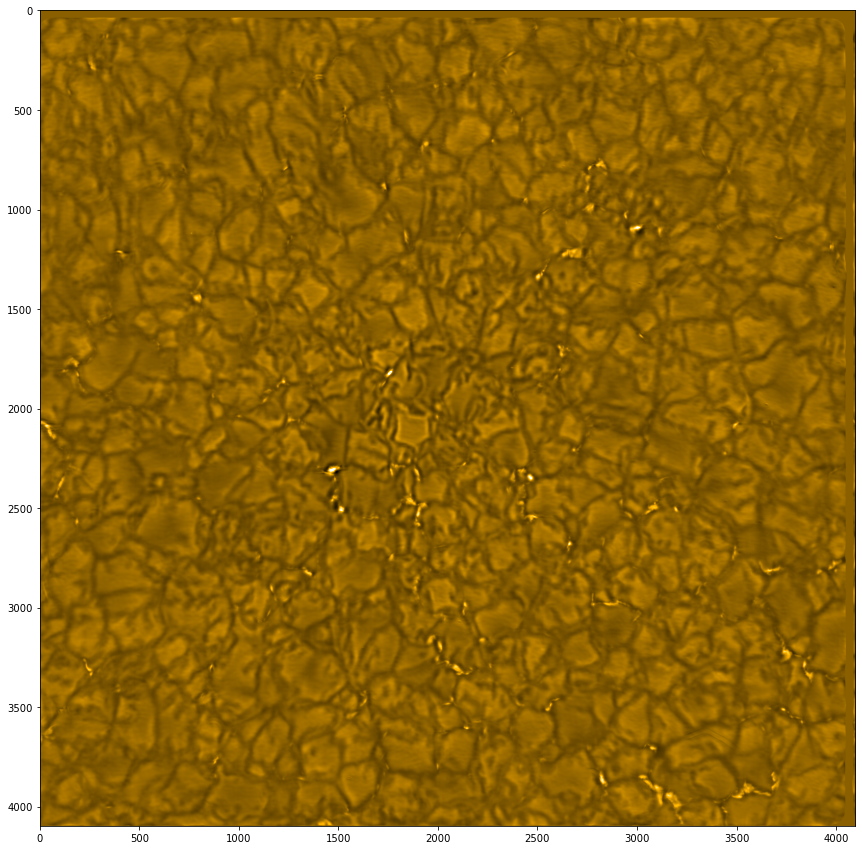

In [58]:
'''
Nice image for poster
'''
import sunpy.visualization.colormaps as cm
dir = '../../Data/DKIST_gband_Oct28_series/'
files = os.listdir(dir)
fig, ax = plt.subplots(1,1,figsize=(15,15))
dat = fits.open(f'{dir}/{files[4]}')[0].data
im = ax.imshow(dat, cmap=plt.get_cmap('goes-rsuvi171'), vmin=0, vmax=0.7)#norm=matplotlib.colors.LogNorm(0.00001,np.nanmax(dat)))

In [ ]:
'''
Plot 
'''
files = [filename for filename in os.listdir(dir) if filename.startswith('VBI')]
n = int(np.floor(np.sqrt(len(files)))**2)
fig, axs = plt.subplots(n, n, figsize=(80,80))
idx = 0
for i in range(n):
    for j in range(n):
        if idx < n**2: axs[i,j].imshow(fits.open(f'{dir}{files[idx]}')[0].data)
        idx += 1
        axs[i,j].xaxis.set_tick_params(labelbottom=False); axs[i,j].yaxis.set_tick_params(labelleft=False); axs[i,j].set_xticks([]); axs[i,j].set_yticks([])
plt.savefig('DISKT_series_Oct28')

In [ ]:
'''
Choose pad
 - 80 to be safe?
'''
plt.figure()
plt.imshow(img[0:200, 0:200], origin='lower')
plt.axvline(80); plt.axhline(80)

#### DKIST 2022_06_03 mosaic [Jun 16, 2023]

36 co-aligned G-band 4096 x 4096 images

Aquired Jun 16 (via https://o365coloradoedu-my.sharepoint.com/:f:/g/personal/kere1282_colorado_edu/EtrAZxZNLl5GqUqfbQZUjc0BUuQgDFZVTEcZ3CpeTuymqw)

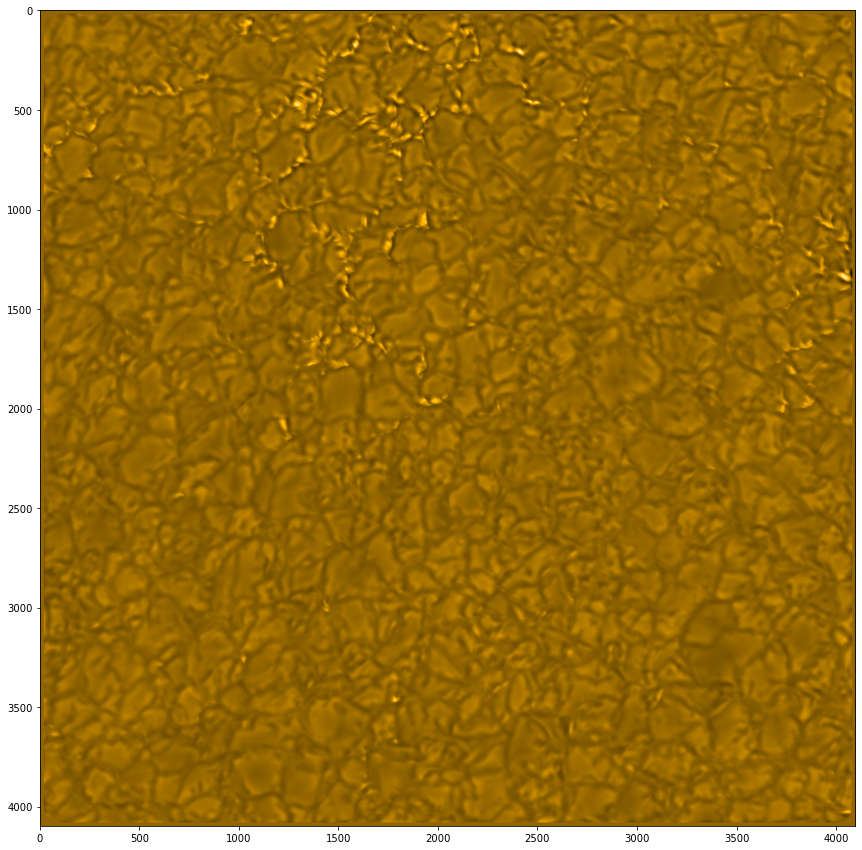

In [63]:
'''
Nice image for poster
'''
import sunpy.visualization.colormaps as cm
dir = '../../Data/DKIST_gband_Jun16_mosaic_tiles/'
files = os.listdir(dir)
fig, ax = plt.subplots(1,1,figsize=(15,15))
idx = np.random.choice(np.linspace(0,len(files)-1,len(files)-1, dtype=int))
dat = fits.open(f'{dir}/{files[idx]}')[1].data # why do these have the data at [1] instead of [0]?
im = ax.imshow(dat, cmap=plt.get_cmap('goes-rsuvi171'))#, vmin=0, vmax=0.5)

In [ ]:
files = os.listdir('../Data/DKIST_gband_Jun16_mosaic_tiles/')
print(len(files))
print(fits.open('../Data/DKIST_gband_Jun16_mosaic_tiles/'+files[0])[1].data.shape)

In [ ]:
'''
EXPLORE NEW-NEW (AS OF 6/16) DATA TO SEE IF I CAN USE IN FOR NNS
'''

'''
From below, seems quite challenging to simply mask out blurry regions in order to histogram match on just the good ones.
BUT Kevin has just given me a lot more data that may be of better quality.
First, lets take a look at this new data
'''

# fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16), (ax17, ax18), (ax19, ax20), (ax21, ax22), (ax23, ax24), (ax25, ax26), (ax27, ax28), (ax29, ax30), (ax31, ax32), (ax33, ax34), (ax35, ax36)) =  plt.subplots(18, 2, figsize=(25, 200)); axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24, ax25, ax26, ax27, ax28, ax29, ax30, ax31, ax32, ax33, ax34, ax35, ax36]
# dir = "../Data/DKIST_gband_mosaic_tiles_Jun16/"
# files = [filename for filename in os.listdir(dir)] 
# spikefiles = ['VBI_2022_06_03T17_31_21_026_00430500_I_BEQYB_L1.fits', 'VBI_2022_06_03T18_04_29_806_00430500_I_AYGPA_L1.fits', 'VBI_2022_06_03T18_33_13_806_00430500_I_AVVXA_L1.fits', 'VBI_2022_06_03T18_59_14_286_00430500_I_BPDWB_L1.fits']
# for i in range(0, len(files)):
#     data = fits.open(dir+files[i])[1].data
#     if files[i] in spikefiles: data = data[0:data.shape[1]-300, 0:data.shape[1]-300] # remove sharp intensity spike in corner
#     axs[i].set_title(files[i])
#     im = axs[i].imshow(data, origin='lower')
#     plt.colorbar(im, ax=axs[i])

'''
Some (31_21, 04_29, 33_13, 59_14) have big spikes in the corner, so need to remove edges 
Some (31_21, 33_13) just seem super super blurry, so lets ignore them
Save this data with the same tags as the old new new data (but save a list of what tags these are so I can know later)
jun16tags = ['17_20', '17_23', '24_08', '24_23', '24_26', '25_39', '28_27', '31_21', '36_25', '04_05', '04_08', '04_11', '04_14', '04_17', '04_20', '04_23', '04_26', '04_29', '15_12', '15_15', '23_31', '23_34', '30_14', '31_27', '31_33', '32_52', '33_13', '37_15', '42_22', '42_31', '42_34', '46_32', '56_11', '56_20', '56_23', '59_14']
'''

# ogdir = "../Data/DKIST_gband_Jun16_mosaic_tiles/"
# newdir = "../Data/All_DKIST/"
# files = [filename for filename in os.listdir(ogdir)] 
# badfiles = ['VBI_2022_06_03T17_31_21_026_00430500_I_BEQYB_L1.fits', 'VBI_2022_06_03T18_33_13_806_00430500_I_AVVXA_L1.fits']
# jun16tags = []
# for i in range(len(files)):
#     tag = files[i][files[i].find('03T')+6: files[i].find('03T')+11]
#     jun16tags.append(tag)
#     name = f'VBI_{tag}_4096'
#     shutil.copyfile(ogdir+files[i], newdir+name)
# print(jun16tags)

'''
Lets also move the feb06 files into the same folder, saving a list of the same tags
feb06tags = ['00_12', '01_34', '02_56', '50_36', '51_58', '53_20', '54_43', '56_05', '57_27', '58_49']
'''

# ogdir = "../Data/DKIST_gband_Feb06_series_183653/"
# newdir = "../Data/All_DKIST/"
# files = [filename for filename in os.listdir(ogdir)] 
# feb06tags = []
# for i in range(len(files)):
#     if not '03T' in files[i]:
#         #print(newdir+files[i])
#         shutil.move(ogdir+files[i], newdir+files[i])
#         tag = files[i][files[i].find('VBI')+4:-5]
#         feb06tags.append(tag)
# print(list(np.unique(np.array(feb06tags))))


In [ ]:
# How much cutting can I do?

data = np.squeeze(fits.open('Data/DKIST_gband_series_183653/SEG_VBI_54_43_4096')[0].data)
data =  data[20:-20, 20:-20] # remove edges cause theres weird edge effects
plt.figure(); plt.imshow(data)
plt.figure(); plt.imshow(data[0:int(np.shape(data)[0]/5), 0:int(np.shape(data)[1]/5)])
plt.figure(); plt.imshow(data[0:int(np.shape(data)[0]/10), 0:int(np.shape(data)[1]/10)])
plt.figure(); plt.imshow(data[0:int(np.shape(data)[0]/15), 0:int(np.shape(data)[1]/15)])

In [ ]:
OG_data = fits.open("Data/DKIST_example.fits")[0].data
# OG_header = fits.open("Data/DKIST_example.fits")[0].header NOT CORRECT!!!
OG_data_seg = np.squeeze(fits.open("Data/DKIST_solarseg_output.fits")[0].data)
new_data = fits.open("Data/DKIST_gband_series_183653/VBI_2022_06_03T18_50_36_353_00430500_I_BPDWB_L1.fits")[1].data
new_header = fits.open("Data/DKIST_gband_series_183653/VBI_2022_06_03T18_50_36_353_00430500_I_BPDWB_L1.fits")[1].header
new_data_cut = fits.open("Data/DKIST_gband_series_183653/SEG_VBI_2022_06_03T18_50_36_353_00430500_I_BPDWB_L1.fits")[1].data
new_data_seg_cut = fits.open("Data/DKIST_gband_series_183653/SEG_VBI_2022_06_03T18_50_36_353_00430500_I_BPDWB_L1.fits")[0].data[0,:,:]
print(np.shape(new_data_seg_cut))

fig, (ax1, ax2, ax3) =  plt.subplots(1, 3, figsize=(15, 4))
axs = [ax1, ax2, ax3]
ax1.imshow(OG_data, origin='lower'); ax1.set_title('OG data', color=tc)
ax2.hist(OG_data.reshape(-1), range=(4000, 60000), bins=1000, density=True); ax2.set_title('OG data values', color=tc)
ax3.imshow(OG_data_seg, origin='lower'); ax3.set_title('OG data segmented (labels)', color=tc)
plt.suptitle('Res 0.017 arcsec/pix,  WL 789.2 nm', color=tc)
for ax in axs: ax.tick_params(labelcolor=tc, color=tc)

fig, (ax1, ax2, ax3) =  plt.subplots(1, 3, figsize=(15, 4))
axs = [ax1, ax2, ax3]
ax1.imshow(new_data_cut, origin='lower'); ax1.set_title('new data (cut)', color=tc)
ax2.hist(new_data_cut.reshape(-1), range=(4000, 60000), bins=1000, density=True); ax2.set_title('new data values', color=tc)
ax3.imshow(new_data_seg_cut, origin='lower'); ax3.set_title('new data segmented (labels)', color=tc)
plt.suptitle('Res '+str(np.round(new_header['cdelt1'], 3))+' arcsec/pix,  WL '+str(new_header['linewav'])+' nm', color=tc)
for ax in axs: ax.tick_params(labelcolor=tc, color=tc)

# NOTE
# 1) New images have similar spatial scale, but twice as many pixels -> much higher resolution
# 2) New images more blurred. Have wider pix value range, but its much less peaked, e.g more uniform
# 3) Segmentation is NOT working for new images.

In [ ]:
# Why does 53_20 seems to get stuck, even when cut down to sizes where the first two run fast??
# They all looks similar

dir = os.getcwd()+"/Data/DKIST_gband_series_183653/"
files = os.listdir(dir)

fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) =  plt.subplots(2, 5, figsize=(20, 7))
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
i = 0
for file in files:
    if not (file.startswith('seg_') or file.startswith('SEG_')):
        data = fits.open(dir+file)[1].data # for files in DKIST_gband_series_183653, first HDU is just header
        data = data[0:int(np.shape(data)[0]/3), 0:int(np.shape(data)[1]/3)] # cut data by a factor of 9
        axs[i].imshow(data, origin='lower'); 
        label =  file[file.find('03T')+6:file.find('_00')-4] #print(label)
        axs[i].set_title(label, color=tc)
        i +=1
for ax in axs: ax.tick_params(labelcolor=tc, color=tc)


fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) =  plt.subplots(2, 5, figsize=(20, 7))
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
i = 0
for file in files:
    if not (file.startswith('seg_') or file.startswith('SEG_')):
        data = fits.open(dir+file)[1].data # for files in DKIST_gband_series_183653, first HDU is just header
        data = data[0:int(np.shape(data)[0]/3), 0:int(np.shape(data)[1]/3)] # cut data by a factor of 9
        axs[i].hist(data.reshape(-1)); 
        label =  file[file.find('03T')+6:file.find('_00')-4] #print(label)
        axs[i].set_title(label, color=tc)
        i +=1
for ax in axs: ax.tick_params(labelcolor=tc, color=tc)

#### DKIST 2022_06_03 series_183653 [Feb 06, 2023]

10 co-aligned G-band 4096 x 4096 images, 82 second cadence

Aquired Feb 06, 2023 (via https://o365coloradoedu-my.sharepoint.com/:f:/g/personal/kere1282_colorado_edu/EtrAZxZNLl5GqUqfbQZUjc0BUuQgDFZVTEcZ3CpeTuymqw)

In [ ]:
'''
Check quality of time series (NOTE 7/23/24 WHY DID I HAVE THIS. THIS WAS THE FIRST SET RIGHT? AND I WASNT LOOKING AT IT AS A T SERIES RIGHT?)
'''
files = os.listdir('../Data/DKIST_gband_Feb06_series_183653/')
print(len(files))
print(fits.open('../Data/DKIST_gband_Feb06_series_183653/'+files[0])[1].data.shape)
print(fits.open('../Data/DKIST_gband_Feb06_series_183653/'+files[0])[1].header)
fig, axs = plt.subplots(1, 10, figsize=(20, 5))
for i in range(len(files)):
    axs[i].imshow(fits.open(f'../Data/DKIST_gband_Feb06_series_183653/{files[i]}')[1].data[100:200, 100:200])

#### MURaM 


https://www.dropbox.com/scl/fi/ehskqolsfzv5rn03r1w8s/MURaM_continuum_dx16km_dt2s.zip?rlkey=v5hw5cfl9gr076boo3lligde6&e=1&dl=0

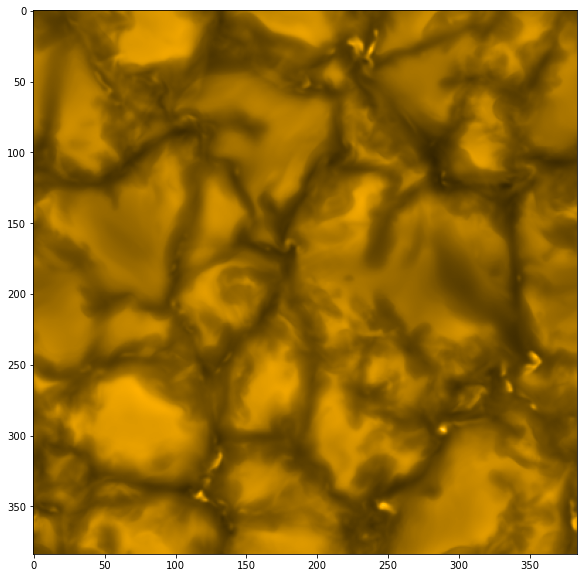

In [9]:
import sunpy.visualization.colormaps as cm
dir = '../../Data/MURaM/'
files = [f for f in os.listdir(dir) if 'SEG' not in f]
fig, ax = plt.subplots(1,1,figsize=(10,10))
dat = fits.open(f'{dir}/{files[2]}')[0].data
im = ax.imshow(dat, cmap=plt.get_cmap('goes-rsuvi171'), vmin=-0.2, vmax=1.2)

In [ ]:
'''
Explore as time-series (wasn't using it that way in UNetData_MURaM)
Tags are indeed sequential: 00000, 00020, 000040, etc. (e.g. 000160 is the 80th image)
    BPs: change shape on the scale of ~20 images (~40 sec), but total lifetime at least as long as total series
    GRs: break up on the scale of ~840 images (~1680sec)
    So perhaps lets try including imformation from the ~20 images on either side of the target image - maybe doing -21, -14, -7, img, +7, +14, +21?
'''

dt = 2 # Benoit says should be 2 sec between images 
muram_files = os.listdir('../Data/MURaM/')
print(f'{len(muram_files)} images, so assuming {dt} sec/image, {np.round((len(muram_files) * dt)/60/60, 4)} total hours')
print(f'Shape: {fits.open("../Data/MURaM/"+muram_files[0])[0].data.shape}, at  0.0211 ''/pix -> 6 Mm by 6 Mm')
a=b

# fig, axs = plt.subplots(40, 5, figsize=(20,160))
# skip = 4
# fig.suptitle(f'Every {skip}th MURaM Image', fontsize='16', y=0.885)
# idx = 0
# for i in range(40):
#     for j in range(5):
#         axs[i,j].imshow(fits.open('../Data/MURaM/'+muram_files[idx])[0].data)
#         axs[i,j].set_title(f'Img {muram_files[idx][7:12]} ({idx*dt} sec)')
#         axs[i,j].xaxis.set_tick_params(labelbottom=False); axs[i,j].yaxis.set_tick_params(labelleft=False)
#         axs[i,j].set_xticks([]); axs[i,j].set_yticks([])
#         idx += skip
# plt.savefig('MURaM_images')

#### MURaM mag

In [ ]:
'''
Look at possible ways to transform mag
'''
data = np.load('../Data/UNetData_MURaM/images/train/000130__3.npy')
m = np.load('../Data/UNetData_MURaM/mag_images/train/000130__3.npy')
fig, axs = plt.subplots(1,4, figsize=(20, 5))
im0 = axs[0].imshow(data); plt.colorbar(im0, ax=axs[0])
im1 = axs[1].imshow(m); plt.colorbar(im1, ax=axs[1])
mag1 = (m - np.mean(m))/np.std(m)
mag1[mag1 > -4] = 0
im2 = axs[2].imshow(mag1); plt.colorbar(im2, ax=axs[2])
mag2 = m**2
mag2 = (mag2 - np.mean(mag2))/np.std(mag2)
#mag[mag > 0] = 0
im3 = axs[3].imshow(mag2); plt.colorbar(im3, ax=axs[3])

In [ ]:
'''
Explore MURaM_mag 
 - Same sequential tags: 00000, 00020, 000040, etc. correspond to the same time as in flux series
'''
dt = 2  
muram_files = os.listdir('../Data/MURaM/')
print(f'MURaM img set:\n\t{len(muram_files)} images, so assuming {dt} sec/image, {np.round((len(muram_files) * dt)/60/60, 4)} total hours')
print(f'\tShape: {fits.open("../Data/MURaM/"+muram_files[0])[0].data.shape}, at  0.0211 ''/pix -> 6 Mm by 6 Mm')
muram_mag_files = os.listdir('../Data/MURaM_mag/')
print(f'MURaM mag set:\n\t{len(muram_mag_files)} images, so assuming {dt} sec/image, {np.round((len(muram_mag_files) * dt)/60/60, 4)} total hours')
print(f'\tShape: {fits.open("../Data/MURaM_mag/"+muram_mag_files[0])[0].data.shape}, at  0.0211 ''/pix -> 6 Mm by 6 Mm')
a=b

#### MISC

In [ ]:
'''
Change names to just tags for newly acquired data
  - Tags: 47_54_640 -> 47min54sec640msec
'''

dir = '../Data/DKIST_gband_Oct28_series/'
movefiles = True; redo = True
if movefiles:
    download_dir = '../gband_destretched/gband_destretched/' # FIRST manually extract zipped folder, move to Solar_ML_2022
    if redo:  
        shutil.rmtree(dir)
        os.mkdir(dir)
    for file in os.listdir(download_dir):
        if os.path.exists(f'{dir}{file}') == False:
            shutil.copy(f'{download_dir}{file}', f'{dir}{file}')
print(len(os.listdir(download_dir)), len(os.listdir(dir))) # should both be 200

files = [filename for filename in os.listdir(dir) if filename.startswith('VBI')]
print(len(files))
for file in files:
    tag = file[file.find('26T')+6:file.find('26T')+15]
    os.rename(f'{dir}{file}',f'{dir}VBI_{tag}')
files = [filename for filename in os.listdir(dir) if filename.startswith('VBI')]; print(len(files))
#shutil.rmtree(download_dir)